# Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment.
A number of characteristics about the patient are
included in each row.

● 'ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they didn't show up

### Question(s) for Analysis

**Does age affect the attendance?**

**Does age and chronic diaseases comined affect?**

**Does gender affect the attendance?**

**Does receiving SMS affect the attenddance?**

**Does neighbourhood affect the attendance?**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
pd.options.display.max_rows = 99999

In [69]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.3MB/s eta 0:00:01   19% |██████▎                         | 2.1MB 28.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01   15% |████▉                           | 2.0MB 28.6MB/s eta 0:00:01    44% |██████████████▎                 | 6.0MB 27.8MB/s eta 0:00:01    63% |████████████████████▌           | 8.6MB 27.0MB/s eta 0:00:01    82% |██████████████████████████▌     | 11.1MB 24.9MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling


In [70]:
df = pd.read_csv("NoShow.csv")

In [71]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [72]:
df.shape

(110527, 14)

**The data contains 110527 appointments(rows) and 14 columns**

In [73]:
sum(df.duplicated())

0

**There's no duplicated rows**

In [74]:
df["PatientId"].duplicated().sum()

48228

**48228 Patient ID are duplicated**

In [75]:
df.duplicated(["PatientId", "No-show"]).sum()

38710

**There are 38710 Patient ID have the same No-show status**

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**There's no missing values**

In [77]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

**The mean age is 37 the max is 115 and the min is -1 and that's a mistake so we will deal with it later in the data cleaning**


### Data Cleaning

 

In [78]:
#Searching for the row that has -1 age with query
mask = df.query('Age == -1')
mask

PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No

In [79]:
#Removing the -1 value row
df.drop(index= 99832, inplace= True)

In [80]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105260e+05   1.105260e+05  110526.000000  110526.000000   
mean   1.474934e+14   5.675304e+06      37.089219       0.098266   
std    2.560943e+14   7.129544e+04      23.110026       0.297676   
min    3.921784e+04   5.030230e+06       0.000000       0.000000   
25%    4.172536e+12   5.640285e+06      18.000000       0.000000   
50%    3.173184e+13   5.680572e+06      37.000000       0.000000   
75%    9.438963e+13   5.725523e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110526.000000  110526.000000  110526.000000  110526.000000   
mean        0.197248       0.071865       0.030400       0.022248   
std         0.397923       0.258266       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110526.000000  
mean        0.321029  
std         0.466874  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [81]:
#renamming column name
df.rename(columns = {"Hipertension" : "hypertension"},inplace = True)
df.rename(columns = {"No-show" : "no_show"}, inplace= True)
df.head(1)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  hypertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received no_show  
0         0           0        0             0      No

In [82]:
#dropping patintId with the same no show status
df.drop_duplicates(["PatientId", "no_show"], inplace= True)
df.shape


(71816, 14)

In [83]:
#removing unuseful data
df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"], axis = 1, inplace= True)
df.head()

Gender  Age      Neighbourhood  Scholarship  hypertension  Diabetes  \
0      F   62    JARDIM DA PENHA            0             1         0   
1      M   56    JARDIM DA PENHA            0             0         0   
2      F   62      MATA DA PRAIA            0             0         0   
3      F    8  PONTAL DE CAMBURI            0             0         0   
4      F   56    JARDIM DA PENHA            0             1         1   

   Alcoholism  Handcap  SMS_received no_show  
0           0        0             0      No  
1           0        0             0      No  
2           0        0             0      No  
3           0        0             0      No  
4           0        0             0      No

<a id='eda'></a>
## Exploratory Data Analysis

### General Look ###

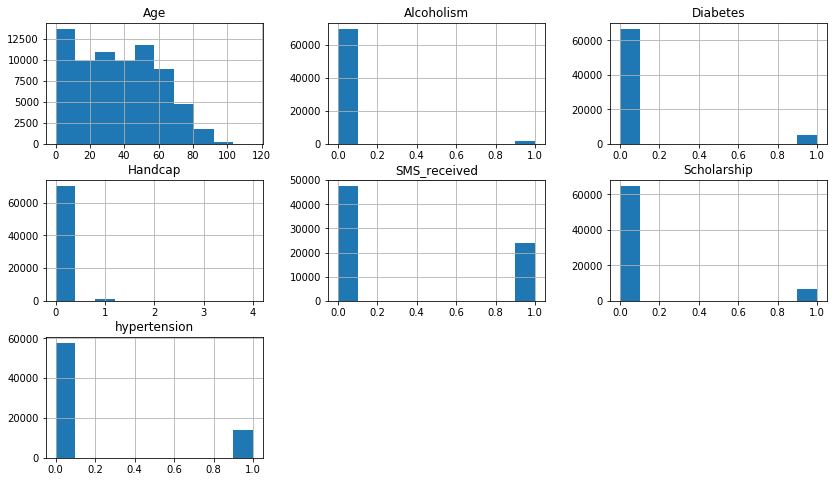

In [84]:
df.hist(figsize= (14,8));

In [85]:
#Spliting the patints into two groups according their No-Show status
came = df.no_show == "No"
noshow = df.no_show == "Yes"
df[came].count(), df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 no_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 no_show          17663
 dtype: int64)

54153 patient came to their appiontment and 17663 didn't

In [86]:
df[came].mean(), df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

Mean age for patients who came is 37, patients who didn't is 34.
patienta who came recieved less sms than patienta who didn't came(that means there's a proplem in the sms campaign)

## Investigation for the influencing factors on the attendance rate

### Question 1 
### Does age affect the attendance?

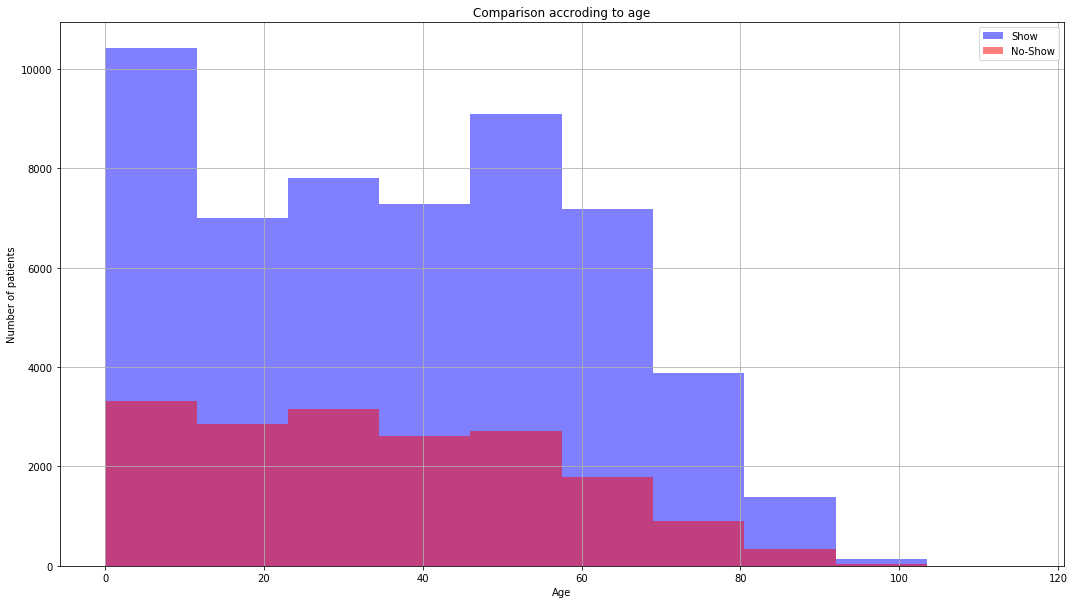

In [87]:
def attendance(df,col_name,attend,absent):
    
    plt.figure(figsize = [18,10])
    df[col_name][came].hist(alpha = .5, bins= 10, color = "b", label= "Show")
    df[col_name][noshow].hist(alpha= .5,bins= 10,color= 'red', label= "No-Show")
    plt.legend();
    plt.title("Comparison accroding to age")
    plt.xlabel("Age")
    plt.ylabel("Number of patients")
    
attendance(df,"Age",came,noshow)

ages from 0:8 are the most showing to their appointments then patients from 45:55 and the least attending are whom above 65 years old

### Question 2 
### Does age and chronic diaseases combined affect the attendance?

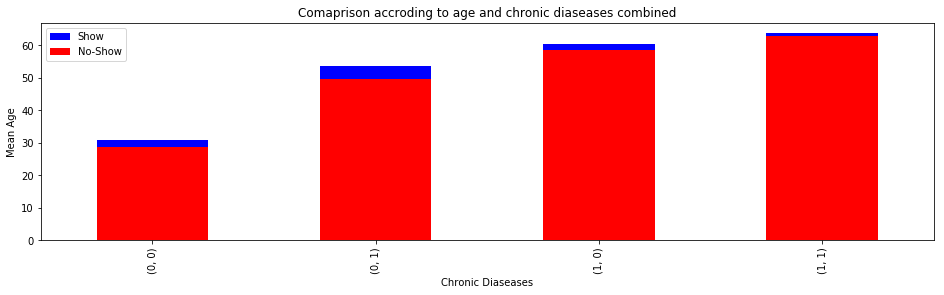

In [88]:
plt.figure(figsize= [16,4])
df[came].groupby(["hypertension", "Diabetes"]).mean()["Age"].plot(kind= "bar", color = "b",label= "Show")
df[noshow].groupby(["hypertension", "Diabetes"]).mean()["Age"].plot(kind= "bar", color= "r", label= "No-Show")
plt.legend();
plt.title("Comaprison accroding to age and chronic diaseases combined")
plt.xlabel("Chronic Diaseases")
plt.ylabel("Mean Age");

In [89]:
df[came].groupby(["hypertension", "Diabetes"]).mean()["Age"],df[noshow].groupby(["hypertension", "Diabetes"]).mean()["Age"]

(hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

Mean age of non chronic diaseases patienta who came is 30 and who didn't is 28.
Mean age of hypertensive diabetic showing is around 64 and non showing is about 63 which means there's no correlation between chronic diaseases and attending.

### Questions 3

### Does gender affect the attendance?

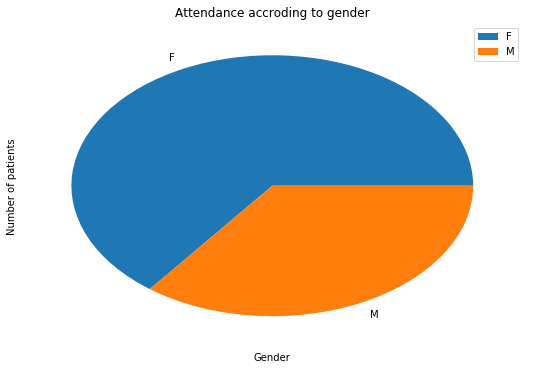

In [90]:
def attendance(df,col_name,attend,absent):
    plt.figure(figsize= [9,6])
    df[col_name][came].value_counts(normalize= True).plot(kind = "pie",label= "Show")
    plt.legend();
    plt.title("Attendance accroding to gender")
    plt.xlabel("Gender")
    plt.ylabel("Number of patients")
attendance(df,"Gender",came,noshow);

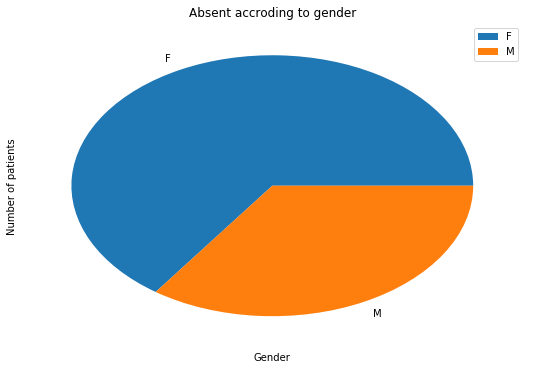

In [91]:
def attendance(df,col_name,attend,absent):
    plt.figure(figsize= [9,6])
    df[col_name][noshow].value_counts(normalize= True).plot(kind= "pie",label= "No-Show")
    plt.legend();
    plt.title("Absent accroding to gender")
    plt.xlabel("Gender")
    plt.ylabel("Number of patients")
attendance(df,"Gender",came,noshow);

**Gender doesn't affect the attendance**

### Question 4

### Does receiving SMS affect the attendance?

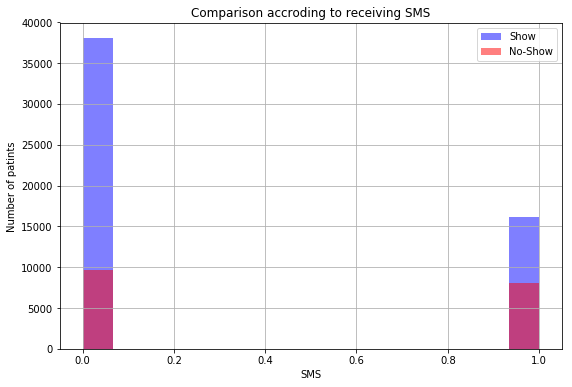

In [92]:
def attendance(df,col_name,attend,absent):
    plt.figure(figsize= [9,6])
    df[col_name][came].hist(alpha = .5,bins = 15,color= "b",label= "Show")
    df[col_name][noshow].hist(alpha = .5, bins= 15, color= "r", label= "No-Show")
    plt.legend();
    plt.title("Comparison accroding to receiving SMS")
    plt.xlabel("SMS")
    plt.ylabel("Number of patints")
attendance(df,"SMS_received",came,noshow);

**Number of showing patients without receiving SMS is greater than patients who received SMS and came**

### Question 5

### Does neighbourhood affect the attendance?

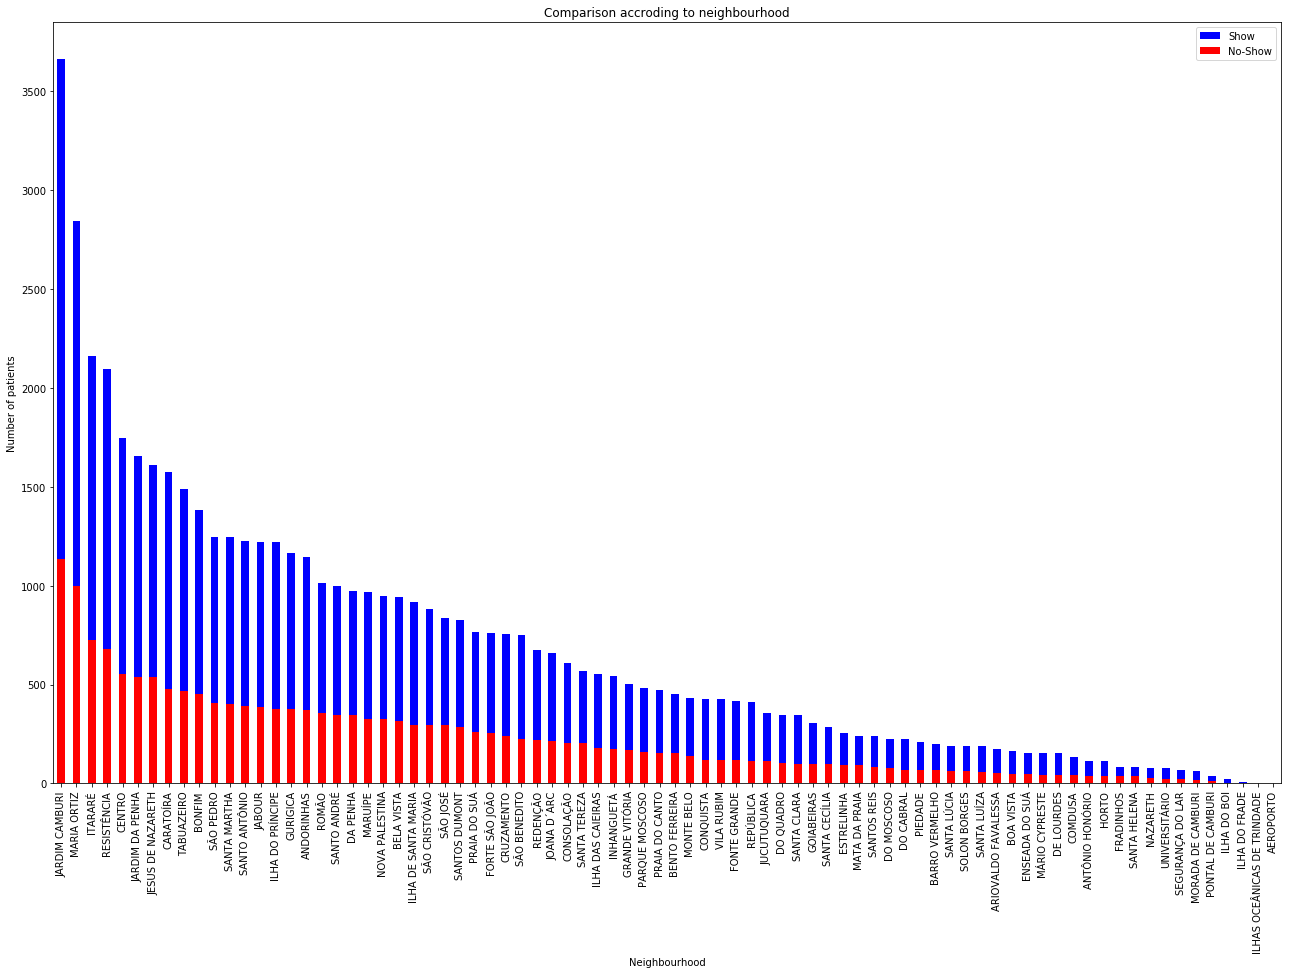

In [93]:
plt.figure(figsize= [22,14])
df.Neighbourhood[came].value_counts().plot(kind= "bar",color= "b", label= "Show")
df.Neighbourhood[noshow].value_counts().plot(kind= "bar", color= "r", label = "No-Show")
plt.legend();
plt.title("Comparison accroding to neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of patients");


**Neighbourhoods has a clear impact on attendance, JARDAIM CAMBURI has the greatest number of patients and also the greatest showing rate**

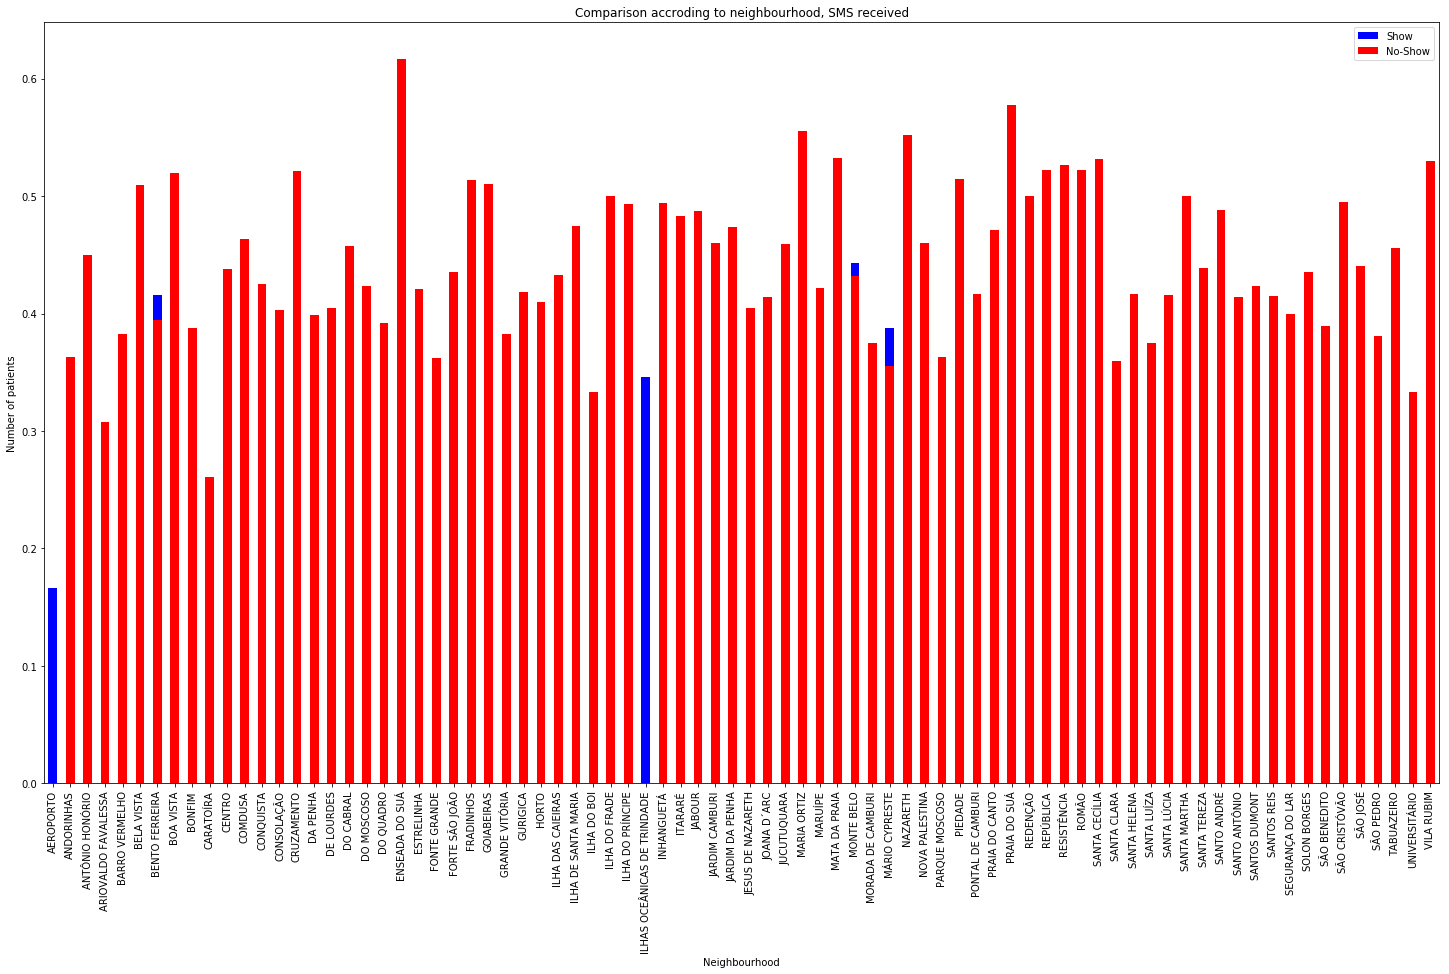

In [94]:
plt.figure(figsize= [25,14])
df[came].groupby("Neighbourhood").SMS_received.mean().plot(kind= "bar", color= "b",label= "Show")
df[noshow].groupby("Neighbourhood").SMS_received.mean().plot(kind= "bar", color = 'r', label= "No-Show")
plt.legend();
plt.title("Comparison accroding to neighbourhood, SMS received")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of patients");

**SMS has reaponse in only 5 neighbourhoods, ILHAS OCEANICAS DE TRINDADE is the most responsive neighbourhood to SMS**

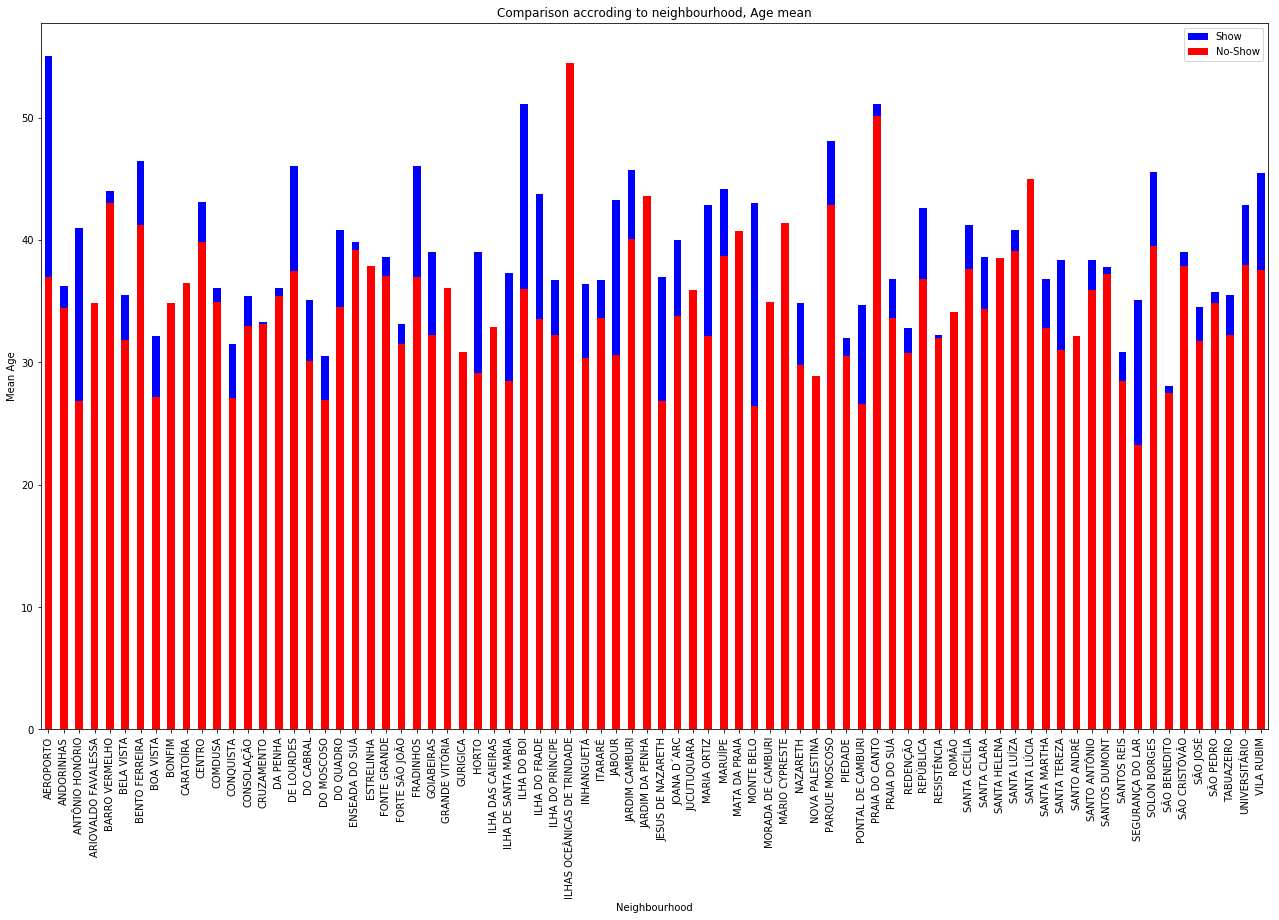

In [95]:
plt.figure(figsize= [22,13])
df[came].groupby("Neighbourhood").Age.mean().plot(kind = "bar", color= "b",label= "Show")
df[noshow].groupby("Neighbourhood").Age.mean().plot(kind = "bar", color= 'r', label= "No-Show")
plt.legend();
plt.title("Comparison accroding to neighbourhood, Age mean")
plt.xlabel("Neighbourhood")
plt.ylabel("Mean Age");

**Patients attendance from specific neighbourhoods, AEROPORTO then ILHA DO BOI are with high ages attendance**

<a id='conclusions'></a>
## Conclusions

**Neighbourhoods has a great affect on attendance, JARDAIM CAMBURI has the greatest number of patients and also the greatest showing rate.**

**Number of showing patients from specific neighbourhood affected by SMS received and ages**

**Age has a clear impact on the showing rate, Ages from 0:8  are the most showing then from 45:55 and the least attending are whom above 65 years**

**Number of patients who came without receiving SMS is greater than showing patients who received SMS(we have to improve rhe SMS campaign**


## limitations

**No clear correlation between showing and gender, chronic diaseases, enrollment in the wellfare program**


In [96]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0